# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

# 1. Introdução

### Enunciado

A QuantumFinance está acompanhando um crescimento de inadimplência entre seus clientes e solicita a consultoria para desenvolver uma análise com base na sua carteira atual de clientes.

Para que a QuantumFinance tome decisões mais precisas sobre concessões de crédito, ela precisa aprimorar seu modelo de crédito. 

Com o objeto de trazer novos clientes com o perfil de baixo risco de crédito desenvolva um modelo de Credit Scoring.

Desafio: Desenvolver o modelo preditivo mediante uso do valor target disponível na base de dados “Base_ScoreCredito_QuantumFinance.csv” e criar um simulador do modelo para os analistas de créditos e gerentes de conta. 


#### Entregáveis:

Jupyter Notebook e Word


# 2. Configurações Iniciais

## 2.1. Importação de Bibliotecas

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import pointbiserialr

from scipy.stats.stats import pearsonr
from scipy.stats import pearsonr

from scipy.stats import chi2_contingency
from scipy.stats import chi2

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_22566/2076183705.py:8: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


## 2.2. Carregamento dos Dados

In [2]:
df_raw = pd.read_excel(r'Base_ScoreCredito_QuantumFinance.xlsx')
df_raw.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


## 2.3. Tratamento fx_SCORE_CREDITO

In [64]:
# Criar os quartis
minimo = min(df_raw['SCORE_CREDITO'])
Q1 =  np.percentile(df_raw['SCORE_CREDITO'], 25)
Q2 =  np.percentile(df_raw['SCORE_CREDITO'], 50)
Q3 =  np.percentile(df_raw['SCORE_CREDITO'], 75)
maximo = max(df_raw['SCORE_CREDITO'])
print(minimo, Q1, Q2, Q3, maximo)

162.0 375.0 449.6 540.9 979.65


In [65]:
# Criar a variável faixa de quantidade de bikes alugadas
df_raw.loc[(df_raw['SCORE_CREDITO'] >= minimo) & (df_raw['SCORE_CREDITO'] <= Q1),     'fx_SCORE_CREDITO']='162 a 375'
df_raw.loc[(df_raw['SCORE_CREDITO'] > Q1)      & (df_raw['SCORE_CREDITO'] <= Q2),     'fx_SCORE_CREDITO']='375 a 449'
df_raw.loc[(df_raw['SCORE_CREDITO'] >  Q2)     & (df_raw['SCORE_CREDITO'] <=Q3),      'fx_SCORE_CREDITO']='449 a 540'
df_raw.loc[(df_raw['SCORE_CREDITO'] >  Q3)     & (df_raw['SCORE_CREDITO'] <= maximo), 'fx_SCORE_CREDITO']='540 a 979'

# 3. Análise Inicial das variáveis

## 3.1 idade

<Figure size 1000x600 with 0 Axes>

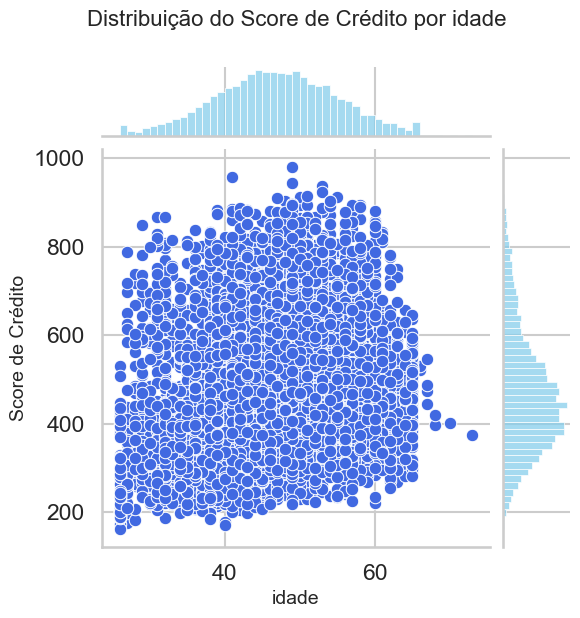

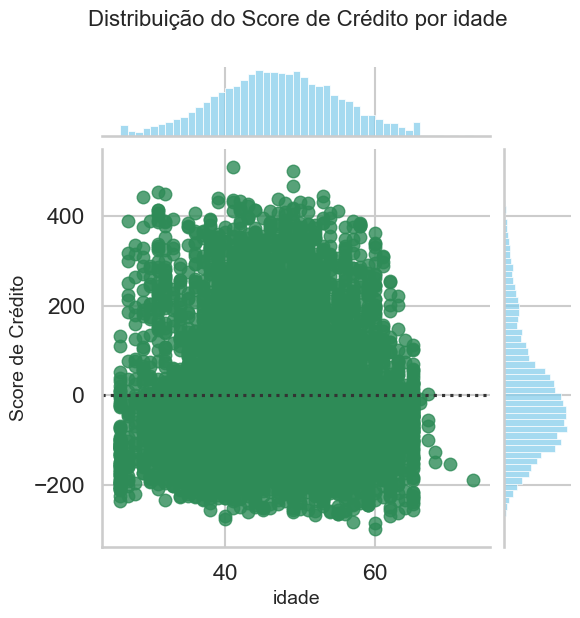

In [45]:
# Define a variável
variavel = 'idade'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()


In [ ]:
# Correlação de Pearson
pearsonr(df_raw['idade'], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.2133198240252024), pvalue=np.float64(1.4881542889982393e-104))

## 3.2 sexo

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_22566/3724121811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


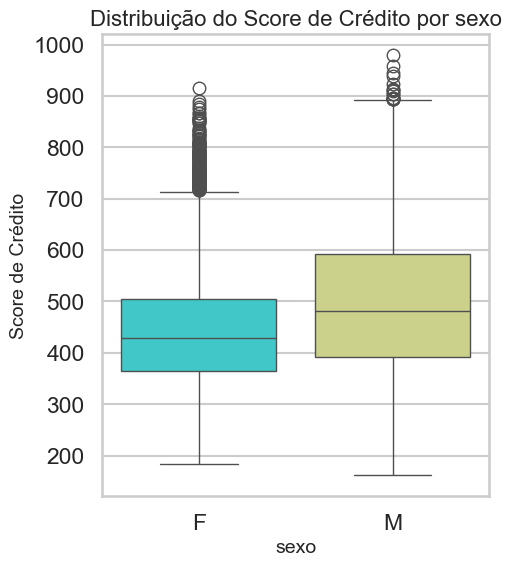

In [62]:
# Define a variável
variavel = 'sexo'

# Criar uma figura grande
fig = plt.figure(figsize=(5, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)

# Exibir os gráficos
plt.show()


<Figure size 500x600 with 0 Axes>

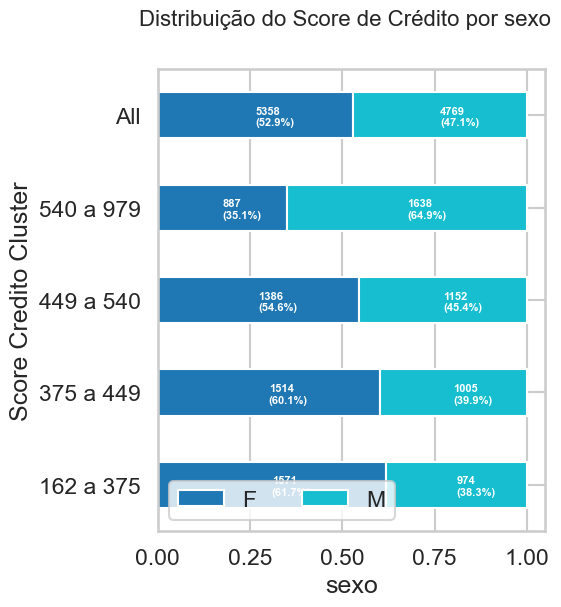

In [66]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw['sexo'],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw['sexo'],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [69]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[1346.51031895 1198.48968105]
 [1332.75422139 1186.24577861]
 [1342.80675422 1195.19324578]
 [1335.92870544 1189.07129456]]
probability=0.950, critical=7.815, stat=455.117
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 3.3 Estado Civil

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_22566/1518379358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


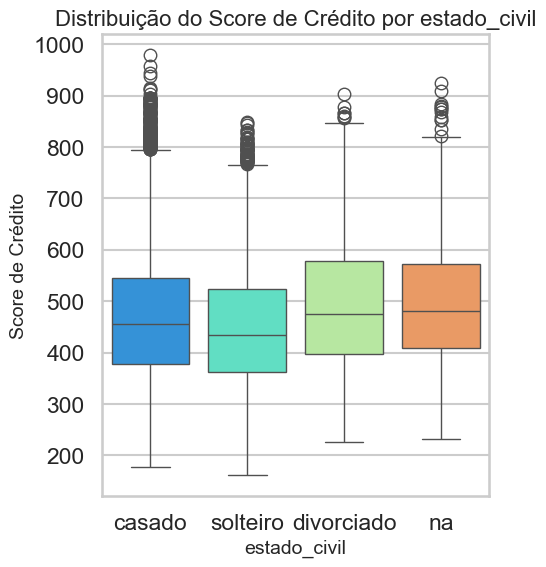

In [70]:
# Define a variável
variavel = 'estado_civil'

# Criar uma figura grande
fig = plt.figure(figsize=(5, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

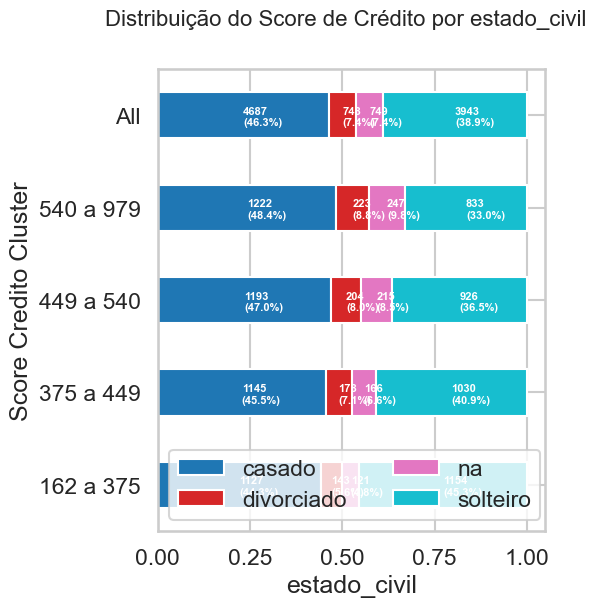

In [72]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [73]:

# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[1177.8823936   187.97867088  188.22997926  990.90895626]
 [1165.84901748  186.0582601   186.30700109  980.78572134]
 [1174.64263849  187.46163721  187.71225437  988.18346993]
 [1168.62595043  186.50143182  186.75076528  983.12185247]]
probability=0.950, critical=16.919, stat=130.788
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 3.4 Escola

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_22566/158107889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


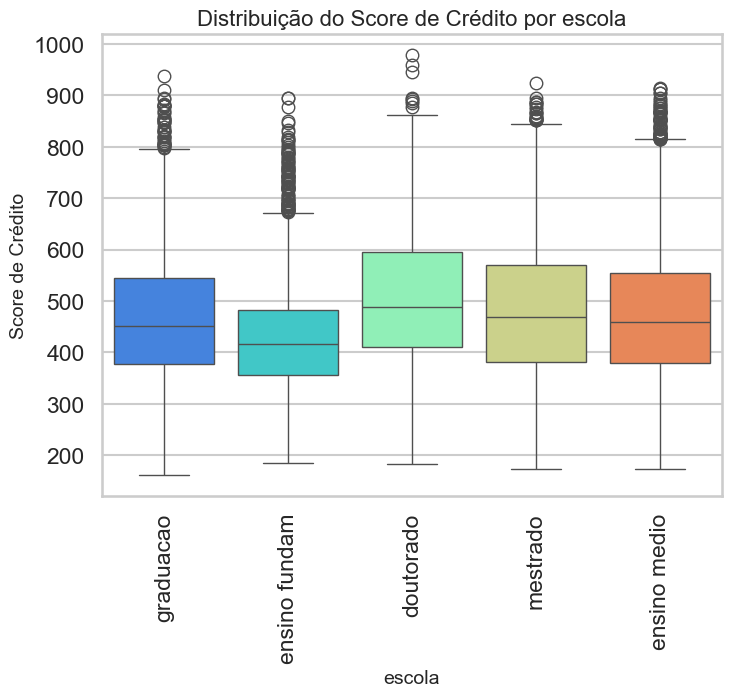

In [79]:
# Define a variável
variavel = 'escola'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

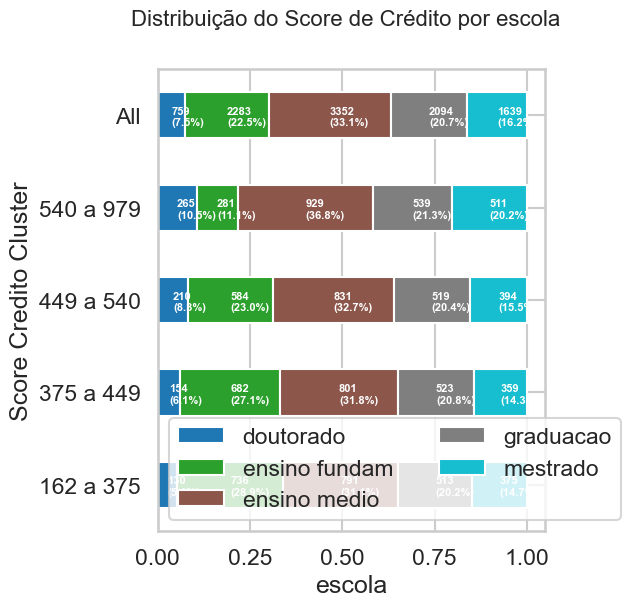

In [80]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [81]:

# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=12
[[190.7430631  573.7370396  842.38570159 526.23975511 411.8944406 ]
 [188.79441098 567.87567888 833.77979658 520.86363188 407.68648168]
 [190.21842599 572.15898094 840.06872717 524.79233732 410.76152859]
 [189.24409993 569.22830058 835.76577466 522.1042757  408.65754913]]
probability=0.950, critical=21.026, stat=324.462
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 3.5 Qtde_Dependentes

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_22566/887680058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


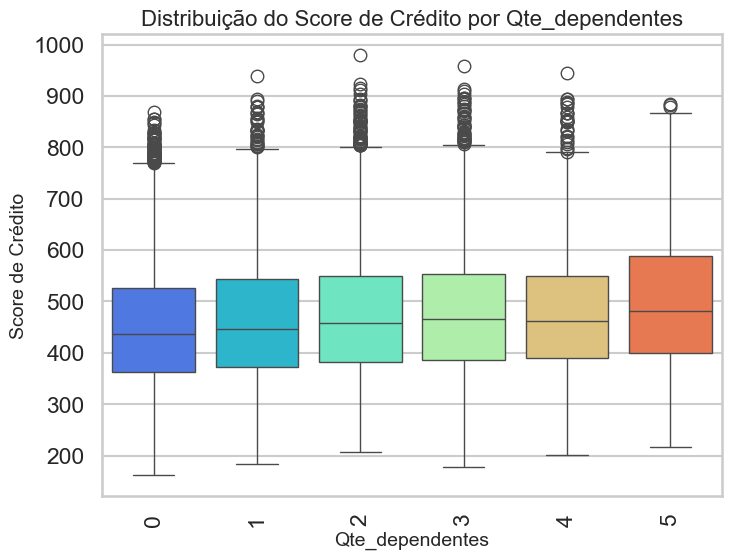

In [84]:
# Define a variável
variavel = 'Qte_dependentes'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

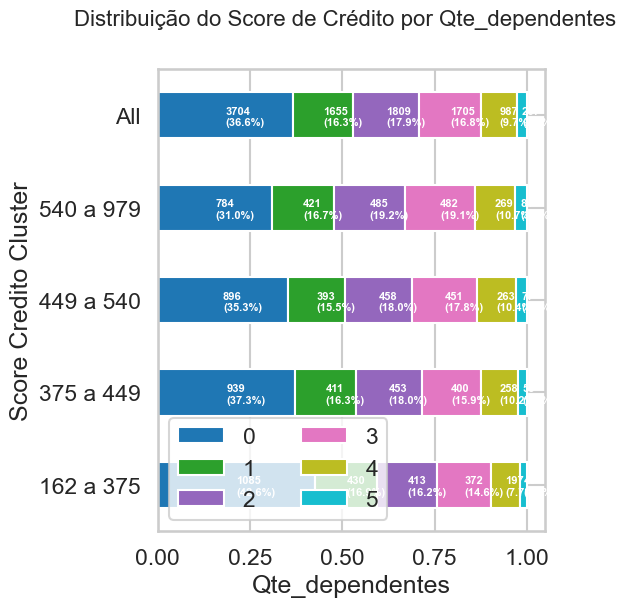

In [85]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [86]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=15
[[930.84625259 415.91537474 454.6168658  428.48079392 248.04137454
   67.0993384 ]
 [921.33662486 411.66633751 449.97244989 424.10338699 245.50735657
   66.41384418]
 [928.2859682  414.77140318 453.36644613 427.30226128 247.35913894
   66.91478227]
 [923.53115434 412.64688457 451.04423818 425.11355782 246.09212995
   66.57203515]]
probability=0.950, critical=24.996, stat=100.882
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 3.6 tempo_ultimoservico

<Figure size 1000x600 with 0 Axes>

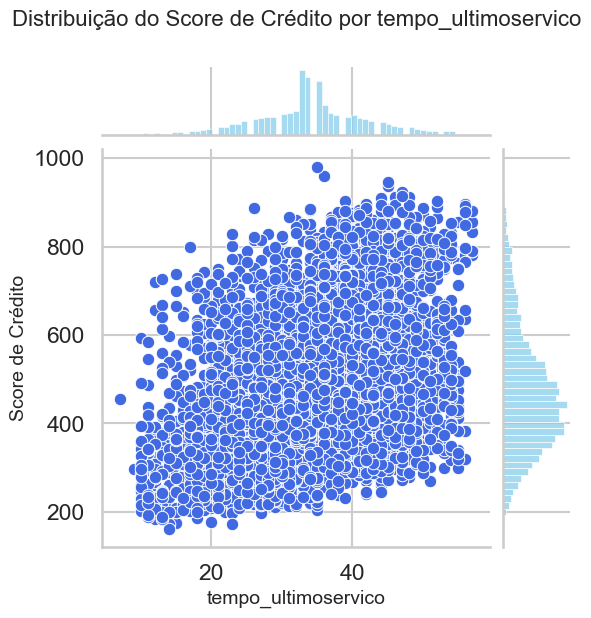

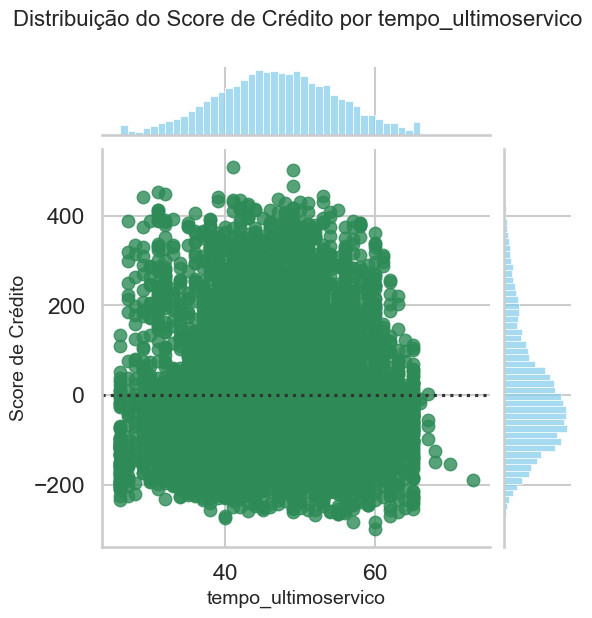

In [88]:
# Define a variável
variavel = 'tempo_ultimoservico'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [89]:
# Correlação de Pearson
pearsonr(df_raw['idade'], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.2133198240252024), pvalue=np.float64(1.4881542889982393e-104))